# Example 2: Birth-Death process

In the previous example we simulated the first order decay of a species X. In this example we will extend the system to include synthesis of $X$ driven by an external signal, $I$.

Mathematically, our system now amounts to: 

$ \frac{dX}{dt} = kI(t) - \gamma X $. 

We will assume $k=1\ min^{-1}$, $\gamma=2\ min^{-1}$ and $X_0=0$. 

Simulating this process in GeneSSA requires two new objects:

    1. A reaction that produces X in response to I
    2. A signal object for input I
   

### 1. Creating a synthesis reaction

Our synthesis reaction obeys mass action kinetics, but we now need to add an input dependence term using the `input_dependence` parameter. The argument accepts an array of coefficients detailing the order by which the propensity function depends upon each dimension of the input. In this case, we only have one input so the vector is of length one.

In [52]:
from genessa.kinetics.massaction import MassAction

synthesis = MassAction(stoichiometry=[1], k=1, input_dependence=1)

### 2. Creating a signal

GeneSSA offers several types of time-dependent signals. These objects allow for discrete sampling of analytical functions of time, $S(t)$. Their sole argument is the time $t$, for which they return the signal value S(t). Some simple functions include:

`cSignal` - constant value (zero order hold) defined by an on value

`cSquarePulse` - square pulse defined by off/on values and on/off times

`cSquareWave` - square waveform defined by off/on values and an oscillation period

We will define a square pulse, which will result in a transient period of $X$ synthesis. We want this pulse to turn on at $t=1$ and turn off at $t=3$.

In [53]:
from genessa.signals.signals import cSquarePulse

signal = cSquarePulse(t_on=1., t_off=3., on=100.)

### 3. Assembling everything

We can add both our reactions to the network as a list.

In [54]:
from genessa.kinetics.massaction import MassAction
from genessa.solver.stochastic import MonteCarloSimulation
from genessa.networks.networks import Network

# define decay reaction
decay = MassAction(stoichiometry=[-1], k=2)

# add both reactions to the network
network = Network(N=1, I=1, reactions=[decay, synthesis])

# instantiate solver
solver = MonteCarloSimulation(network, ic=[0])

# Running the simulation

We provide our input signal when calling the `run()` method using the `signal` parameter.

In [55]:
timeseries = solver.run(N=100, duration=5, dt=0.01, signal=signal)

# Plotting the simulated dynamics

The solver returns a `timeseries` instance that contains each of the simulated trajectories for all state dimensions within the network. These trajectories can be accessed directly via the `timeseries.states` attribute.

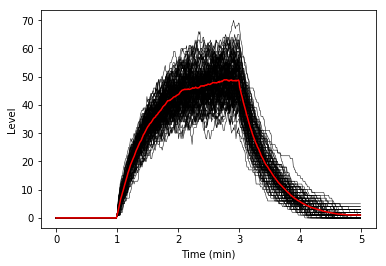

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# define the state dimension of interest
species = 0

# create figure
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Time (min)')
ax.set_ylabel('Level')

# add a black line for each individual trajectory 
for trajectory in timeseries.states[:, species, :]:
    ax.plot(timeseries.t, trajectory, '-k', lw=0.5)

# add a red line for the mean of all simulated trajectories
_ = ax.plot(timeseries.t, timeseries.mean[species], '-r')